<a href="https://colab.research.google.com/github/IndraLawliet13/Tugas-Besar-AKA/blob/main/Tubes_AKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update
!apt-get install g++
!apt-get install libgmp3-dev libmpfr-dev libmpc-dev

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
%%writefile aka.cpp
#include <iostream>
#include <iomanip>
#include <cmath>
#include <chrono>
#include <gmpxx.h> // Untuk presisi tinggi

using namespace std;
using namespace chrono;

// Fungsi faktorial (diperlukan untuk menghitung penyebut)
mpz_class factorial(int n) {
    mpz_class fact = 1;
    for (int i = 2; i <= n; i++) {
        fact *= i;
    }
    return fact;
}

// Algo A: Iteratif
mpf_class sin_iteratif(double x, int n) {
    mpf_set_default_prec(256); // Set presisi (sesuaikan sesuai kebutuhan)
    mpf_class x_mpf(x);
    mpf_class hasil = 0;
    for (int i = 0; i < n; i++) {
        mpf_class tanda = (i % 2 == 0) ? 1 : -1;
        mpf_class pembilang;
        mpf_pow_ui(pembilang.get_mpf_t(), x_mpf.get_mpf_t(), 2 * i + 1);
        mpz_class penyebut = factorial(2 * i + 1);
        hasil += tanda * (pembilang / penyebut);
    }
    return hasil;
}

// Algo B: Rekursif
mpf_class sin_rekursif(double x, int n) {
    mpf_set_default_prec(256);
    mpf_class x_mpf(x);
    if (n == 0) {
        return x_mpf;
    } else {
        mpf_class tanda = (n % 2 == 0) ? 1 : -1;
        mpf_class pembilang;
        mpf_pow_ui(pembilang.get_mpf_t(), x_mpf.get_mpf_t(), 2 * n + 1);
        mpz_class penyebut = factorial(2 * n + 1);
        return tanda * (pembilang / penyebut) + sin_rekursif(x, n - 1);
    }
}

// Fungsi untuk mengukur running time
double ukur_running_time(mpf_class (*fungsi)(double, int), double x, int n) {
    auto start_time = high_resolution_clock::now();
    fungsi(x, n);
    auto end_time = high_resolution_clock::now();
    duration<double> time_span = duration_cast<duration<double>>(end_time - start_time);
    return time_span.count();
}

int main() {
    double x = M_PI / 4; // Contoh: x = pi/4
    int n_values[] = {10, 100, 1000, 10000, 20000}; // Jumlah suku yang akan diuji
    int num_n_values = sizeof(n_values) / sizeof(n_values[0]);

    cout << "Hasil perhitungan sin(x) (Iteratif vs Rekursif):" << endl;
    cout << fixed << setprecision(10);
    for (int i = 0; i < num_n_values; i++) {
        int n = n_values[i];
        mpf_class hasil_iteratif = sin_iteratif(x, n);
        mpf_class hasil_rekursif = sin_rekursif(x, n);
        cout << "n = " << n << ": Iteratif = " << hasil_iteratif << ", Rekursif = " << hasil_rekursif << endl;
    }

    cout << "\nRunning Time (Iteratif vs Rekursif):" << endl;
    for (int i = 0; i < num_n_values; i++) {
        int n = n_values[i];
        double waktu_iteratif = ukur_running_time(sin_iteratif, x, n);
        double waktu_rekursif = ukur_running_time(sin_rekursif, x, n);
        cout << "n = " << n << ": Iteratif = " << waktu_iteratif << " detik, Rekursif = " << waktu_rekursif << " detik" << endl;
    }

    return 0;
}

Overwriting aka.cpp


In [ ]:
!g++ -o sin_calculation aka.cpp -lgmpxx -lgmp
!./sin_calculation

Hasil perhitungan sin(x) (Iteratif vs Rekursif):
n = 10: Iteratif = 0.7071067812, Rekursif = 0.7071067812
n = 100: Iteratif = 0.7071067812, Rekursif = 0.7071067812
n = 1000: Iteratif = 0.7071067812, Rekursif = 0.7071067812
n = 10000: Iteratif = 0.7071067812, Rekursif = 0.7071067812
n = 20000: Iteratif = 0.7071067812, Rekursif = 0.7071067812

Running Time (Iteratif vs Rekursif):
n = 10: Iteratif = 0.0000232260 detik, Rekursif = 0.0000336720 detik
n = 100: Iteratif = 0.0005268220 detik, Rekursif = 0.0005315700 detik
n = 1000: Iteratif = 0.1252734200 detik, Rekursif = 0.1254246880 detik
n = 10000: Iteratif = 128.5021021040 detik, Rekursif = 128.3378747990 detik
n = 20000: Iteratif = 1096.8593017660 detik, Rekursif = 1093.4230650120 detik


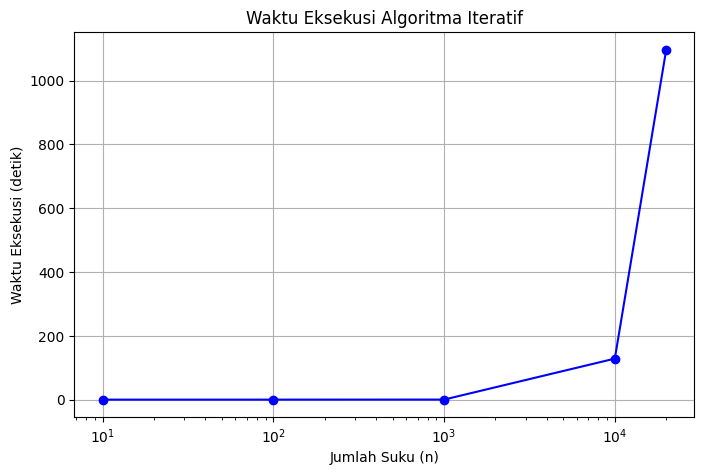

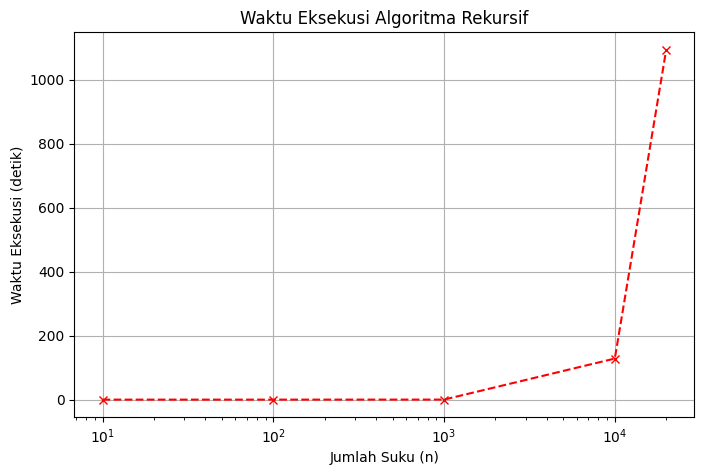

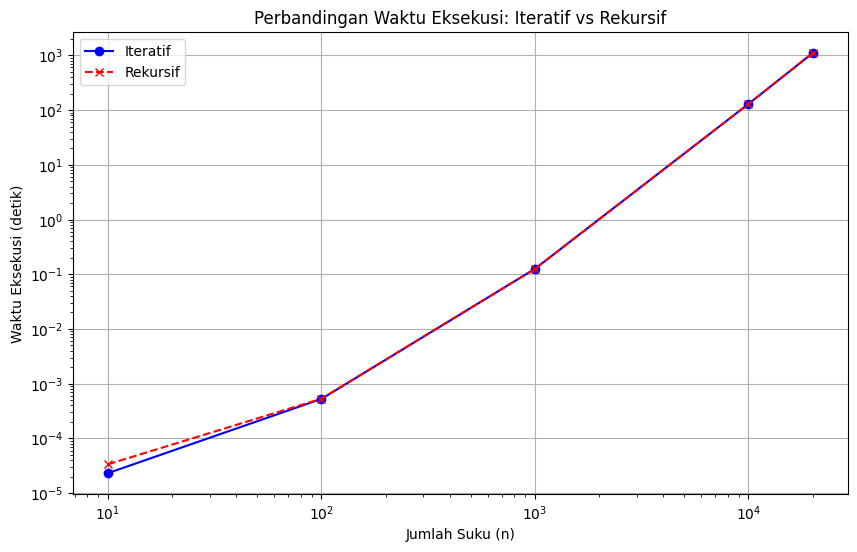

In [ ]:
import matplotlib.pyplot as plt

# Data
n_values = [10, 100, 1000, 10000, 20000]
iterative_times = [0.0000232260, 0.0005268220, 0.1252734200, 128.5021021040, 1096.8593017660]
recursive_times = [0.0000336720, 0.0005315700, 0.1254246880, 128.3378747990, 1093.4230650120]

# --- 1. Grafik Masing-Masing Algoritma ---

# Grafik Iteratif
plt.figure(figsize=(8, 5))
plt.plot(n_values, iterative_times, label='Iteratif', marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Suku (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Waktu Eksekusi Algoritma Iteratif')
plt.xscale('log')  # Skala logaritmik untuk sumbu x
plt.grid(True)
plt.show()
print()

# Grafik Rekursif
plt.figure(figsize=(8, 5))
plt.plot(n_values, recursive_times, label='Rekursif', marker='x', linestyle='--', color='r')
plt.xlabel('Jumlah Suku (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Waktu Eksekusi Algoritma Rekursif')
plt.xscale('log')  # Skala logaritmik untuk sumbu x
plt.grid(True)
plt.show()
print()

# --- 2. Grafik Perbandingan ---

plt.figure(figsize=(10, 6))
plt.plot(n_values, iterative_times, label='Iteratif', marker='o', linestyle='-', color='b')
plt.plot(n_values, recursive_times, label='Rekursif', marker='x', linestyle='--', color='r')
plt.xlabel('Jumlah Suku (n)')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Perbandingan Waktu Eksekusi: Iteratif vs Rekursif')
plt.xscale('log')
plt.yscale('log') # Skala logaritmik untuk kedua sumbu
plt.legend()
plt.grid(True)
plt.show()